# SciPy tutorial

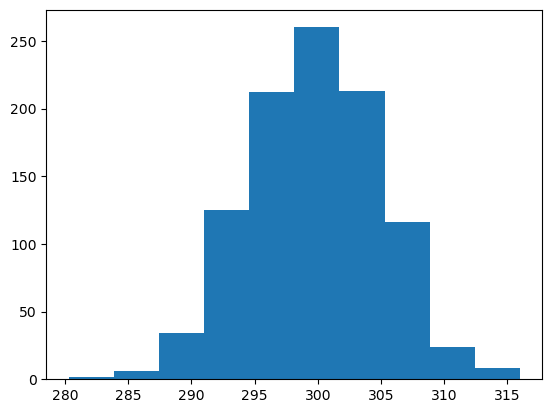

In [1]:
# 정규성 검정
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal1.csv')
plt.hist(df)
plt.show()

In [2]:
from scipy import stats
print(dir(stats))

['BootstrapMethod', 'CensoredData', 'ConstantInputWarning', 'Covariance', 'DegenerateDataWarning', 'FitError', 'MonteCarloMethod', 'NearConstantInputWarning', 'PermutationMethod', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_ansari_swilk_statistics', '_axis_nan_policy', '_biasedurn', '_binned_statistic', '_binomtest', '_boost', '_bws_test', '_censored_data', '_common', '_constants', '_continuous_distns', '_covariance', '_crosstab', '_discrete_distns', '_distn_infrastructure', '_distr_params', '_entropy', '_fit', '_hypotests', '_kde', '_ksstats', '_levy_stable', '_mannwhitneyu', '_morestats', '_mstats_basic', '_mstats_extras', '_multicomp', '_multivariate', '_mvn', '_odds_ratio', '_page_trend_test', '_qmc', '_qmc_cy', '_qmvnt', '_rcont', '_relative_risk', '_resampling', '_rvs_sampling', '_sampling', '_sensitivity_analysis', '_sobol', '_stats', '_stats_mstats_common', '_stats_py', '_stats_pythran', '_su

In [3]:
# 정규성 검정
from scipy.stats import shapiro
print(shapiro(df))

ShapiroResult(statistic=0.9981433805517022, pvalue=0.34796592330595577)


-> 샤피로 검정 시, p-value=0.35 -> 유의수준 5%에서 귀무가설 기각 불가
=> 귀무가설 채택. 정규성을 가진다.<br>
<br>
p-value가 유의수준보다 크면, 유의하므로 귀무가설 기각할 수 없음 -> 귀무가설 채택<br>
p-value < 유의수준이면, 유의하지 않으므로, 귀무가설 기각 -> 대립가설 채택

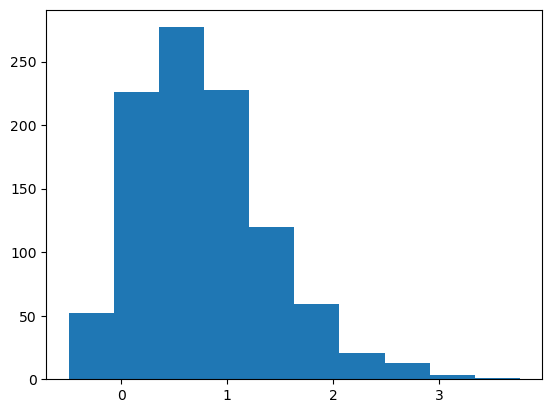

In [4]:
# 2
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal3.csv')
plt.hist(df)
plt.show()

In [5]:
from scipy.stats import shapiro
print(shapiro(df))

ShapiroResult(statistic=0.9578887230674161, pvalue=2.3098528601775786e-16)


**p-value = 2.3e-16** (아주 작은수...)
-> p-value < 0.05 : 유의수준 5%에서 귀무가설 기각 가능, 대립가설 채택<br>
=> 데이터는 정규성을 가지지 않는다.

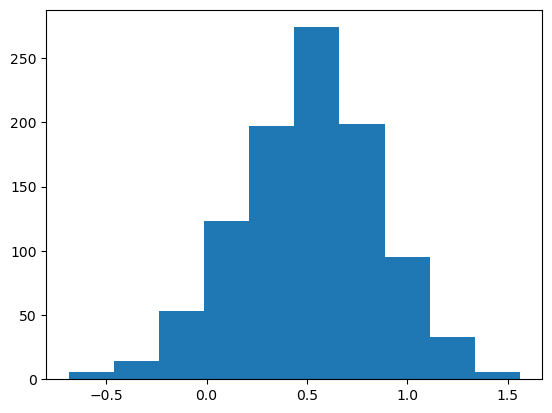

In [6]:
# 3 log 변환 후 정규성 가지는 지 확인
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal3.csv')
log_y_data = np.log1p(df)  # 로그변환!!!!!!
plt.hist(log_y_data)
plt.show()

In [8]:
from scipy.stats import shapiro
print(shapiro(log_y_data))

ShapiroResult(statistic=0.9976879570377135, pvalue=0.17513126966872208)


로그변환 한 데이터 -> p-value > 0.05 귀무가설 기각불가. 귀무가설 채택 <br>
=> 정규성을 가진다.

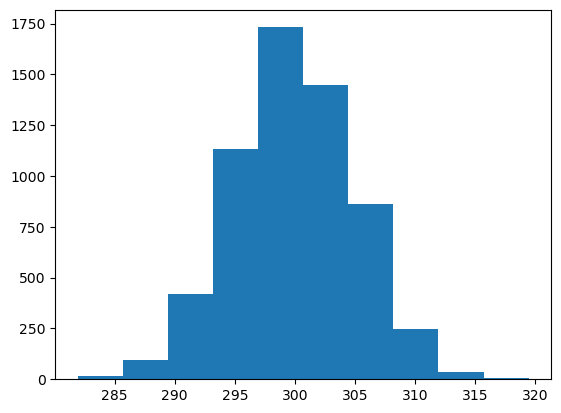

In [9]:
# 7
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal6.csv')
plt.hist(df)
plt.show()

In [10]:
from scipy.stats import shapiro

print(shapiro(df))

ShapiroResult(statistic=0.9995353804150279, pvalue=0.15046155392344363)


/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6000.
  res = hypotest_fun_out(*samples, **kwds)


shapiro 검정 시, p-value > 0.05 이므로 귀무가설 유의함. 귀무가설 기각 불가. 귀무가설 채택<br>
**경고메세지**
5000개 초과의 샘플에 대해서 샤피로 검정은 정확하지 않을 수 o <br>
=> anderson 검정

In [12]:
# anderson 검정(N > 5000)
from scipy.stats import anderson
print(anderson(df['data'].values))

AndersonResult(statistic=0.8266993530396576, critical_values=array([0.576, 0.656, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=299.95980319533163, scale=5.03180688788513)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


### anderson 검정 결과 해석
significance_level : 유의 확률값
critical_values : 각 유의확률 값의 기준점
- 유의수준 5%에서 검정 진행 -> significance_level 5.에서 확인 => critical_values= 0.786
- statistic = 0.82
- **p-value로 판단할 때와 반대..**
- 0.82 > 0.786 (statistic > critical_values) => 귀무가설 기각. 대립가설 채택
=> 정규성을 가지지 않는다.

# 단일 표본 t-검정(one-sample)

100명의 키 정보가 들어 있는 데이터가 있다.데이터가 정규성을 만족하는지 확인하라.
그리고 평균키는 165라 판단할수 있는지 귀무가설과 대립가설을 설정한 후 유의수준 5%로 검정하라.

1. 데이터가 정규성을 만족하는지 확인
2. 정규성을 만족하는 경우
   - 평균 165인지 검정 : 단일 표본 t-검정

3. 정규성을 만족하지 않는 경우
   - 평균 165인지 검정: 윌콕슨 부호순위 검정(비모수)
   - 샘플이 정규분포를 따르지 않으므로,
   - 평균이 아닌 중앙값 기준의 검정 수행
   - df['height'] - 165 형태로 중심값을 기준으로 편차의 부호/순위 계산

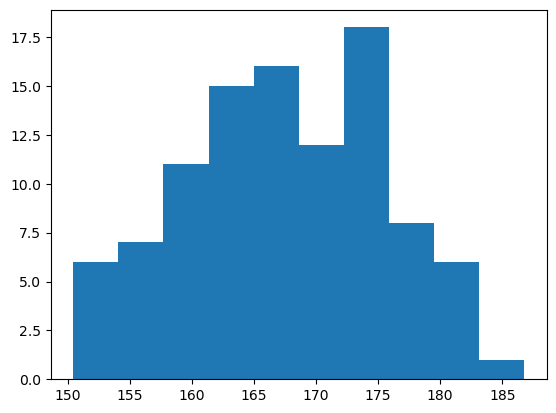

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/height1.csv')
plt.hist(df)
plt.show()

In [14]:
from scipy.stats import shapiro
print(shapiro(df))

ShapiroResult(statistic=0.9872671038154957, pvalue=0.45583339816328994)


p-value > 0.05 이므로 귀무가설 유의. 기각불가. 정규성을 만족한다.

In [15]:
# 평균키 = 165라 할 수 있는지 귀무가설, 대립가설 설정 후 유의수준 5% 검정
# H0: m = 165 , H1: m != 165

from scipy.stats import ttest_1samp, shapiro, wilcoxon
# 데이터의 정규성 먼저 검정
static, pvalue = shapiro(df)
print('샤피로 정규성 검정 p-value: ', pvalue,'이므로')

# 데이터가 정규성을 만족하지 않는 경우
if pvalue < 0.05 : 
    print('귀무가설 기각. 정규성 만족하지 않으므로 비모수 검정 진행. 윌콕슨 순위 부호 검정 진행')

    # 윌콕슨 부호순위 검정
    static, pvalue = wilcoxon(df['height']-165)
    # static, pvalue = wilcoxon(df['height'], np.ones(len(df) * 165) # 여러 표본쌍을 비교할 때 일반적인 형식

    if pvalue < 0.05:
        print(f'검정결과 pvalue 는 {pvalue}이므로 귀무가설 기각. 평균은 165가 아니다')
    else:
        print('평균은 165')

# 데이터가 정규성을 만족하는 경우 -> t-검정
else:
    # 단일 표본 t검정
    static, pvalue = ttest_1samp(df['height'], 165)
    if pvalue < 0.05:
        print('귀무가설 기각')
    else:
        print('귀무가설 채택')
    

샤피로 정규성 검정 p-value:  0.45583339816328994 이므로
귀무가설 기각


## 등분산 검정
두개 학급의 시험성적에 대한 데이터이다 그룹간 등분산 검정을 시행하라

In [16]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy2.csv')
df.head()

,class,score
0,A,84
1,A,59
2,A,49
3,A,57
4,A,82


In [19]:
# 등분산 검정 - 3가지 방법
from scipy.stats import bartlett
from scipy.stats import fligner
from scipy.stats import levene

# a, b: pandas.Series 객체
a = df[df['class'] == 'A'].score
b = df[df['class'] == 'B'].score

#bartlett : 데이터가 정규분포일때 (계산기준 -> 평균)
print(bartlett(a,b))

print(fligner(a,b,center='median')) # default
print(fligner(a,b,center='mean'))
# fligner() : 함수 내부에서 각 그룹의 분산(산포도)를 측정할 때, 
# 데이터 중심으로부터 얼마나 떨어져 있는지를 측정해야됨
# 중심을 어떤 값으로 보느냐 -> center 옵션(기본값: 'median')
# mean: 각 그룹의 평균을 중심으로 분산 계산
# trimmed: 양 끝 10%를 제외한 절사 평균 사용

print(levene(a,b,center='median')) # default
print(levene(a,b,center='mean'))

BartlettResult(statistic=0.26035880448930865, pvalue=0.609873758447687)
FlignerResult(statistic=0.7281251154135562, pvalue=0.39349158741002765)
FlignerResult(statistic=0.8272211734319945, pvalue=0.36307728836821906)
LeveneResult(statistic=0.3145466542912649, pvalue=0.5751662820554713)
LeveneResult(statistic=0.5086970687685527, pvalue=0.4760514837800255)


**center설정**<br>
mean: 이상치에 민감 <br>
median: 비정규분포나 이상치가 있는 데이터에서 훨씬 안정적 <br>
trimmed mean: 극단 값을 잘라내고 평균을 내서 둘 사이의 절충값 <br>

**함수 선정 기준**
- bartlett(): 정규분포+등분산 검정
- levene(): 정규성 여부 애매할 때
- fligner(): 정규성 완전히 무시하고 싶을 때

모든 p-value > 0.05 이므로 귀무가설이 유의함. 귀무가설 기각 불가.<br>
=> 등분산성을 만족한다.

두개 학급의 시험성적에 대한 데이터이다 그룹간 등분산 검정을 시행하라



In [22]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy3.csv')
print(df)

    class  score
0       A     32
1       A     69
2       A     68
3       A     60
4       A     78
..    ...    ...
475     B     60
476     B     56
477     B     56
478     B     52
479     B     77

[480 rows x 2 columns]


In [23]:
from scipy.stats import fligner

# 그룹별로 분리
a = df[df['class'] == 'A'].score
b = df[df['class'] == 'B'].score

print(fligner(a,b,center='median'))


FlignerResult(statistic=4.960366756026232, pvalue=0.025934706256615536)


fligner, levene는 bartlett보다 좀 더 robust하다는 특징이 o    
- robust하다는건.. 모델이 더 튼튼하고 강력함
- 입력데이터의 이상치나 노이즈에 민감하게 흔들리지 x

---
두개 학급의 시험성적에 대한 데이터이다 그룹간 등분산 검정을 시행하라

In [24]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy6.csv')
df.head()

,A,B
0,44,36
1,61,92
2,76,41
3,64,45
4,65,35


In [25]:
from scipy.stats import bartlett
from scipy.stats import fligner
from scipy.stats import levene

# 그룹 분리
a = df['A']
b = df['B']

print(fligner(a,b,center='median'))

# 그냥 print(fligner(df.A, df.B)) 해도 됨....

FlignerResult(statistic=5.124831619122788, pvalue=0.02358585889069899)


---
두개 학급의 시험성적에 대한 데이터이다 그룹간 등분산 검정을 시행하라

In [32]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy5.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       300 non-null    int64  
 1   B       180 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


In [35]:
from scipy.stats import bartlett
from scipy.stats import fligner
from scipy.stats import levene

a = df.A
b = df.B

# df.info() non-null count가 A는 nan없음. B만 nan 존재
print(bartlett(a, b.dropna()))
print(fligner(a, b.dropna()))
print(levene(a, b.dropna()))

BartlettResult(statistic=3.024072692680794, pvalue=0.08203720607748431)
FlignerResult(statistic=7.710320541528441, pvalue=0.005490600130793614)
LeveneResult(statistic=8.008595918808284, pvalue=0.004851565077063262)


nan값 지우고 사용해야됨!!

# 독립표본 검정(Independent)

두개 학급의 시험성적에 대한 데이터이다. 두 학습의 시험 평균(비모수검정의 경우 중위값)은 동일하다 말할 수 있는지 확인 하라

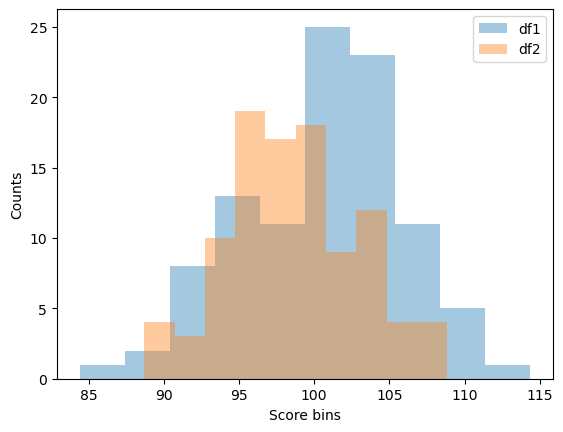

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
df1 = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind1.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind2.csv')

plt.hist(df1, label='df1', alpha = 0.4) # alpha: 투명도
plt.hist(df2, label='df2', alpha = 0.4)
plt.xlabel('Score bins')
plt.ylabel('Counts')
plt.legend() # 범례 표시 위치

plt.show()

In [39]:
df1.head()

,data
0,105.408458
1,108.722618
2,84.398634
3,100.510816
4,100.965949


In [38]:
# 두 학습의 시험 평균(비모수검정의 경우 중위값)은 동일하다 말할 수 있는지
from scipy.stats import shapiro # 정규성 검정
print(shapiro(df1))
print(shapiro(df2))

ShapiroResult(statistic=0.9860948333328386, pvalue=0.37968357263512703)
ShapiroResult(statistic=0.9901827646291551, pvalue=0.6793743269084339)


df1, df2 둘다 p-value > 0.05 -> 귀무가설 유의. 기각 불가 <br>
둘 다 정규성 가짐

In [40]:
from scipy.stats import levene
print()
print(levene(df1['data'], df2['data']))



LeveneResult(statistic=2.5337683795339547, pvalue=0.11302904824469269)


p-value > 0.05 이므로 귀무가설 유의함. 기각 불가 -> 등분산성 가짐<br>
등분산이므로, equal_var=True 파라미터 주고 ttest_ind 모듈로 t-test 진행

In [41]:
from scipy.stats import ttest_ind
print()
print(ttest_ind(df1, df2, equal_var=True))


TtestResult(statistic=array([2.76719074]), pvalue=array([0.00619015]), df=array([198.]))


p-value < 0.05 이므로 귀무가설 기각. 대립가설 채택.<br>
=> 두 학습의 시험 평균은 동일하지 않다.

### Q.
두개 학급의 시험성적에 대한 데이터이다. 두 학습의 시험 평균(비모수검정의 경우 중위값)은 동일하다 말할 수 있는지 확인 하라


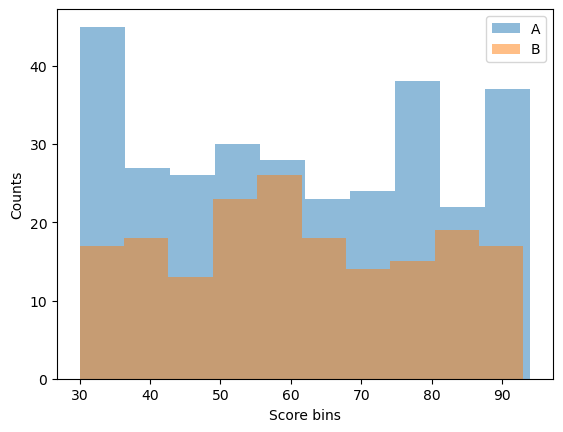

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy5.csv')

plt.hist(df['A'], alpha=0.5, label='A')
plt.hist(df['B'].dropna(), alpha=0.5, label='B')
plt.xlabel('Score bins')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [45]:
# 분포 그려봤을 때 정규성 안보임
# 두 그룹 중 한 그룹만 정규성을 위배해도 독립표본 t-검정 할 수 x
print(shapiro(df['B'].dropna()))
print(shapiro(df['A']))

ShapiroResult(statistic=0.963943232017511, pvalue=0.00013568101164926347)
ShapiroResult(statistic=0.9375393672524903, pvalue=6.175255664338868e-10)


두 그룹 다 p-value < 0.05 이므로 귀무가설 유의 x. 귀무가설 기각 <br>
-> 정규성 만족x => **비모수 검정 실시**

In [47]:
from scipy.stats import mannwhitneyu, ranksums
print()
print(mannwhitneyu(df['A'], df['B'].dropna()))
print(ranksums(df['A'], df['B'].dropna()))


MannwhitneyuResult(statistic=27036.0, pvalue=0.9807458376150018)
RanksumsResult(statistic=0.02446942170858557, pvalue=0.9804781743503561)


mann-whitney u 검정, 윌콕슨 순위합 검정 모두 p-value > 0.05 : 귀무가설 유의<br>
귀무가설 기각 불가. 평균은 동일하다.

### Q.
두개 그룹에 대한 수치형 데이터이다. 두 그룹의 평균은 동일하다 말할 수 있는지 검정하라

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind3.csv')

df
# df.info()

,group,data
0,a,108.065847
1,a,88.714106
2,a,61.182748
3,a,51.763444
4,a,127.858730
...,...,...
185,b,100.192985
186,b,112.081790
187,b,83.148014
188,b,147.504761
